# Machine Learning: Assignment 1 
## k Nearest Neighbors (max. 8p)

### Assignment 1.0: Send the Repository URL address to the teacher.

* Send the URL address of your repository to the teacher.
* Also, you should set the access to the repository to at least **Developer** level for the teacher.

Don't forget to enter your information in the cell below.

In [1]:
# Write your information here!
student_name = 'Juuso Leppänen'
student_email = "AD1885@student.jamk.fi"

## Assignment 1.1
### Topic: Data preprocessing (2 points)

1. Check out the *Congressional Voting Records Data Set* at [https://archive.ics.uci.edu/dataset/105/congressional+voting+records](https://archive.ics.uci.edu/dataset/105/congressional+voting+records).
   * *"This data set includes votes for each of the U.S. House of Representatives Congressmen on the 16 key votes identified by the CQA.  The CQA lists nine different types of votes: voted for, paired for, and announced for (these three simplified to yea), voted against, paired against, and announced against (these three simplified to nay), voted present, voted present to avoid conflict of interest, and did not vote or otherwise make a position known (these three simplified to an unknown disposition)."*

2. Download the dataset from [https://archive.ics.uci.edu/dataset/105/congressional+voting+records](https://archive.ics.uci.edu/dataset/105/congressional+voting+records).
   * save the data file in your local computer in the same directory as this Jupyter Notebook file.

3. Load the data into the **Pandas DataFrame**. Also set the columns according to the "Attribute Information" section of the resource documentation. 
   * Rename the class variable (party column) with the label `party`.

4. Preprocess the data:
   * In the data `y == yes, n == no, ? == not answered`.
   * Convert the y and n answers to numeric values. (`y=1, n=-1`)
   * Also replaces "no answer" text which is marked with question marks. (`? = 0`)
     
      

In [2]:
# TODO: Write your implementation in this cell. 
# TODO: Store your answer in the df variable.
import pandas as pd

# Load dataset (no header in the file)
df = pd.read_csv("house-votes-84.data", header=None)

# Attribute info (16 votes + class)
columns = [
    "party",
    "handicapped-infants",
    "water-project-cost-sharing",
    "adoption-of-the-budget-resolution",
    "physician-fee-freeze",
    "el-salvador-aid",
    "religious-groups-in-schools",
    "anti-satellite-test-ban",
    "aid-to-nicaraguan-contras",
    "mx-missile",
    "immigration",
    "synfuels-corporation-cutback",
    "education-spending",
    "superfund-right-to-sue",
    "crime",
    "duty-free-exports",
    "export-administration-act-south-africa"
]
df.columns = columns

# Map values
mapping = {"y": 1, "n": -1, "?": 0}
for col in df.columns[1:]:  # skip 'party'
    df[col] = df[col].map(mapping)

df.head()

,party,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,-1,1,-1,1,1,1,-1,-1,-1,1,0,1,1,1,-1,1
1,republican,-1,1,-1,1,1,1,-1,-1,-1,-1,-1,1,1,1,-1,0
2,democrat,0,1,1,0,1,1,-1,-1,-1,-1,1,-1,1,1,-1,-1
3,democrat,-1,1,1,-1,0,1,-1,-1,-1,-1,1,-1,1,-1,-1,1
4,democrat,1,1,1,-1,1,1,-1,-1,-1,-1,1,0,1,1,1,1


In [4]:
# Answers to the assignment. Note! Do not edit this cell, just run it after you complete the assignment.
# Save the DataFrame to the df variable.
print(f'Number of rows: {len(df)}')
print(f'Columns: {df.columns}')
print(f'First row by position: {df.iloc[0]}')
# TODO: Uncomment the following two lines
print(f'anti-satellite-test-ban unique values: {df["anti-satellite-test-ban"].unique()}')
print(f'export-administration-act-south-africa unique values: {df["export-administration-act-south-africa"].unique()}')
# Print the number of rows
print(f'Number of rows {df.any(axis=1).sum()}')

Number of rows: 435
Columns: Index(['party', 'handicapped-infants', 'water-project-cost-sharing',
       'adoption-of-the-budget-resolution', 'physician-fee-freeze',
       'el-salvador-aid', 'religious-groups-in-schools',
       'anti-satellite-test-ban', 'aid-to-nicaraguan-contras', 'mx-missile',
       'immigration', 'synfuels-corporation-cutback', 'education-spending',
       'superfund-right-to-sue', 'crime', 'duty-free-exports',
       'export-administration-act-south-africa'],
      dtype='object')
First row by position: party                                     republican
handicapped-infants                               -1
water-project-cost-sharing                         1
adoption-of-the-budget-resolution                 -1
physician-fee-freeze                               1
el-salvador-aid                                    1
religious-groups-in-schools                        1
anti-satellite-test-ban                           -1
aid-to-nicaraguan-contras                 

## Assignment 1.2
### Topic: Data visualization (2 points)

With the help of the visualized figure, can you notice the difference in the voting behavior of the different parties?

Use the DataFrame from the previous assignment.

Draw a **heatmap** from the data, showing first the Republicans and then the Democrats next to each other. So the *congressmen* are the rows and the *legal issues* are the columns.

Remember that a clear figure also includes named axes and a graph title.

* Tip: you can use, for example, the [heatmap descriptor](https://seaborn.pydata.org/generated/seaborn.heatmap.html) from the `seaborn` library.
* Hint: it makes sense to drop the class variable for this image (see `df.drop()`).
* Tip: the color scale can be named with the heatmap parameter `cbar_kws={'label': 'write your own'}`.

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sort rows by party (Republicans first, Democrats after)
df_sorted = df.sort_values(by="party", ascending=False)

# Drop the party column for visualization
votes_only = df_sorted.drop("party", axis=1)

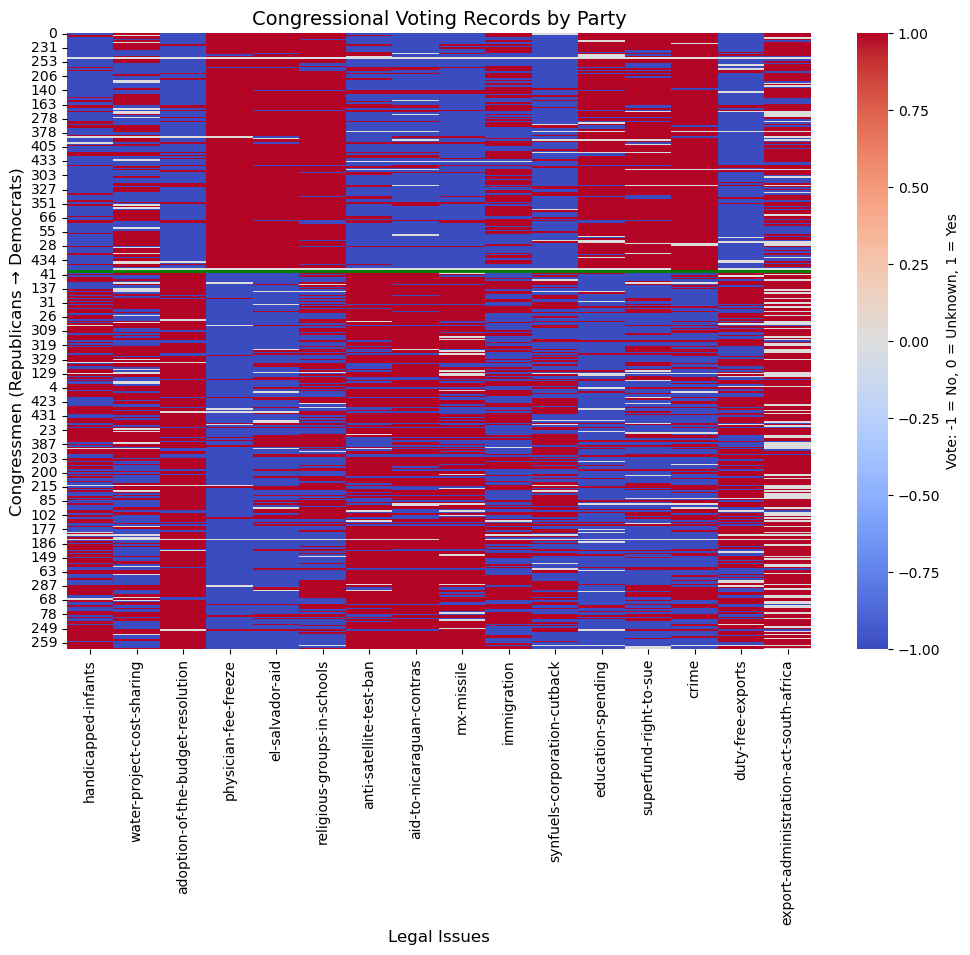

In [50]:
plt.figure(figsize=(12, 8))
ax = sns.heatmap(
    votes_only,
    cmap="coolwarm",
    cbar_kws={'label': 'Vote: -1 = No, 0 = Unknown, 1 = Yes'}
)

# Titles and labels
ax.set_title("Congressional Voting Records by Party", fontsize=14)
ax.set_xlabel("Legal Issues", fontsize=12)
ax.set_ylabel("Congressmen (Republicans → Democrats)", fontsize=12)

# Add a horizontal line after the last Republican
n_republicans = (df_sorted["party"] == "republican").sum()
ax.axhline(n_republicans, color="green", linewidth=2);

## Assignment 1.3
### Topic: kNN classifier (4 points)

Use the scikit-learn library's [kNN classifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) to find the congressman in the dataset that is closest to the person being searched for.

Be sure to drop the class variable (**Party**).

Below are the questions to be given in this assignment

1. Find a congressman who would answer `y` to all legal questions. Save the following information about the Congressman found to these variables:
   * which party he is closest to: `yes_man_party`
   * with what probability he represents this party: `yes_man_proba`
  
2. Find a congressman who would answer the legal questions as follows: `y,y,y,n,n,n,n,y,y,n,y,n,n,y,y,y`.
   * Save the answers in the respective variables `mystery_man_proba` (probability) and `mystery_man_party` (party).

3. Find a congressman who is 100% sure to be a member of the republican party:.
   * Save the answers in the respective variables `re_man_proba` (probability) and `re_man_party` (party).

Tip: when you create the vector of the person who answered all with y, it should be a list of lists: e.g. if there were four variables, `[[1,1,1,1...,1]]` (we have more variables here, so in the answer the vector is longer).

Tip: remember to drop the class variable when training the classifier.

In [ ]:
# TODO: Write your implementation in this cell.
yes_man_party = myst_man_party = re_man_party = None
yes_man_proba = myst_man_proba = re_man_proba = None

from sklearn.neighbors import KNeighborsClassifier

# Features and labels
X = df.drop("party", axis=1)
y = df["party"]

# Train kNN model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y)

# 1) Yes-man: all 'y'
yes_man = [[1]*16]
yes_man_party = knn.predict(yes_man)[0]
yes_man_proba = knn.predict_proba(yes_man).max()

# 2) Mystery man: y,y,y,n,n,n,n,y,y,n,y,n,n,y,y,y
mystery_man = [[1,1,1,-1,-1,-1,-1,1,1,-1,1,-1,-1,1,1,1]]
myst_man_party = knn.predict(mystery_man)[0]
myst_man_proba = knn.predict_proba(mystery_man).max()

# 3) Republican man: 100% sure Republican
probas = knn.predict_proba(X)
classes = knn.classes_
re_man_party, re_man_proba = None, None

for i, p in enumerate(probas):
    if p.max() == 1.0 and classes[p.argmax()] == "republican":
        re_man_party = "republican"
        re_man_proba = 1.0
        break

In [63]:
# Answers to the assignment. Note! Do not edit this cell, just run it after you complete the assignment.
# Save the results in these variables.
print(f"yes man: {yes_man_party} {yes_man_proba}")
print(f"mystery man: {myst_man_party} {myst_man_proba}")
print(f"republican man: {re_man_party} {re_man_proba}")

yes man: republican 0.6666666666666666
mystery man: democrat 1.0
republican man: None None
